In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Data inladen
df = pd.read_csv("Titanic.csv")
 
# Nieuwe kolom: is iemand een kind?
df['IsChild'] = df['Age'] < 18
 
# Combinatiegroep: kind/vrouw/man
df['Group'] = df.apply(lambda row:
                       'Child' if row['IsChild']
                       else ('Female' if row['Sex'] == 'female' else 'Male'),
                       axis=1)
 
# Survival statistieken
group_stats = df.groupby('Group')['Survived'].agg(['count', 'sum'])
group_stats['SurvivalRate'] = group_stats['sum'] / group_stats['count'] * 100
 
# 👉 Dit laat de tabel direct in de notebook zien
group_stats

,count,sum,SurvivalRate
Group,,,
Child,113,61,53.982301
Female,259,195,75.289575
Male,519,86,16.570328


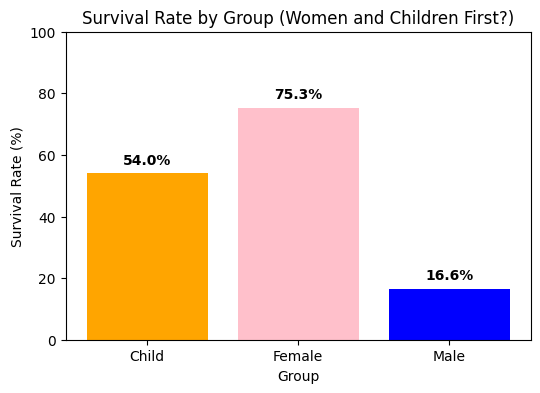

In [4]:
plt.figure(figsize=(6,4))
bars = plt.bar(group_stats.index, group_stats['SurvivalRate'],
               color=['orange', 'pink', 'blue'])
 
# Labels en titel
plt.xlabel('Group')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Group (Women and Children First?)')
 
# Percentage labels boven de balken
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2,
             f"{height:.1f}%", ha='center', va='bottom', fontweight='bold')
 
plt.ylim(0, 100)  # schaal van 0–100%
plt.show()

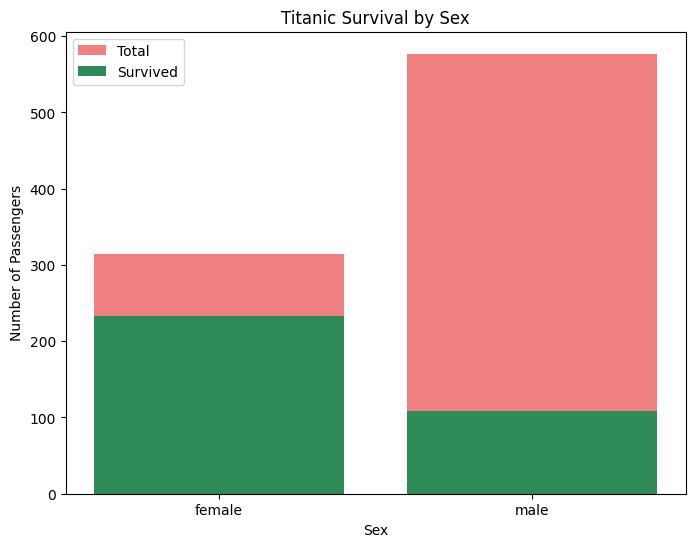

/tmp/ipykernel_13604/3655100257.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_data = df.groupby('AgeGroup')['Survived'].agg(['count', 'sum'])


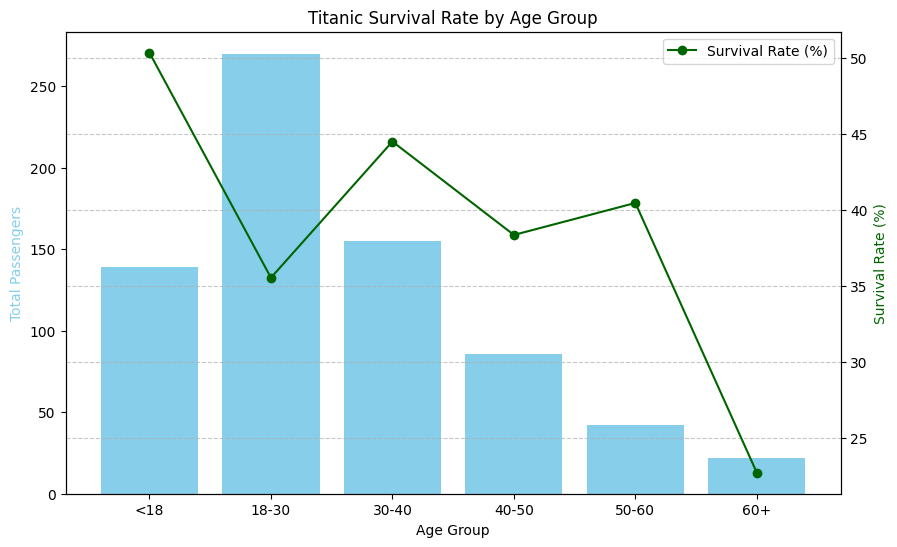

In [5]:
# Author: Your Name
# Description: Visual analysis of Titanic dataset

import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("Titanic.csv")

# ========================
# 1. Survival by Sex
# ========================

# Group by Sex and calculate totals and survivors
sex_counts = df.groupby('Sex')['Survived'].agg(['count', 'sum'])

plt.figure(figsize=(8, 6))
plt.bar(sex_counts.index, sex_counts['count'], label='Total', color='lightcoral')
plt.bar(sex_counts.index, sex_counts['sum'], label='Survived', color='seagreen')

plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.title("Titanic Survival by Sex")
plt.legend()
plt.show()

# ========================
# 2. Survival by Age Group
# ========================

# Define age bins
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']

# Add AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group by AgeGroup
age_group_data = df.groupby('AgeGroup')['Survived'].agg(['count', 'sum'])
age_group_data['SurvivalRate'] = (age_group_data['sum'] / age_group_data['count']) * 100

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for total passengers
ax1.bar(age_group_data.index, age_group_data['count'], color='skyblue', label='Total Passengers')
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Total Passengers", color='skyblue')
ax1.set_title("Titanic Survival Rate by Age Group")

# Line plot for survival rate
ax2 = ax1.twinx()
ax2.plot(age_group_data.index, age_group_data['SurvivalRate'], marker='o', color='darkgreen', label='Survival Rate (%)')
ax2.set_ylabel("Survival Rate (%)", color='darkgreen')

# Add grid and show
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.show()
